In [1]:
%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [2]:
# Specify visible cuda device
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import matplotlib.pyplot as plt

from param import *
from lib.model import *
from lib.utils import *
from run_advgan1 import *

Using TensorFlow backend.


Load MNIST dataset

In [4]:
# Load MNIST
x_train, y_train, x_test, y_test = load_mnist()

Load ACGAN

In [5]:
g = acgan_mnist_model_g_old()
g.compile(optimizer="SGD", loss='sparse_categorical_crossentropy')
#g.load_weights(WEIGHT_DIR + "weight_g_epoch_018.hdf5")
g.load_weights(WEIGHT_DIR + "./acgan_mnist/weight_g_epoch_012.hdf5")

d = acgan_mnist_model_d()
d.compile(optimizer="SGD", loss='sparse_categorical_crossentropy')
#d.load_weights(WEIGHT_DIR + "weight_d_epoch_018.hdf5")
d.load_weights(WEIGHT_DIR + "./acgan_mnist/weight_d_epoch_012.hdf5")

In [6]:
g.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 100)        1000                                         
____________________________________________________________________________________________________
input_1 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 100)           0                                            
___________________________________________________________________________________________

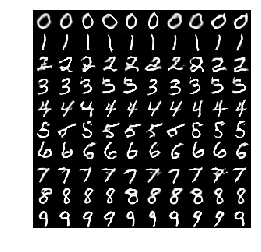

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   [0.3, 0.44, 0.36, 0.49, 0.36, 0.52, 0.51, 0.43, 0.44, 0.45]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   [0.35, 0.47, 0.2, 0.29, 0.26, 0.36, 0.33, 0.28, 0.45, 0.49]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]   [0.29, 0.64, 0.62, 0.58, 0.45, 0.83, 0.48, 0.71, 0.55, 0.64]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]   [0.38, 0.27, 0.3, 0.39, 0.54, 0.29, 0.39, 0.33, 0.34, 0.44]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]   [0.33, 0.53, 0.32, 0.53, 0.52, 0.63, 0.57, 0.32, 0.4, 0.47]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]   [0.53, 0.42, 0.25, 0.55, 0.41, 0.22, 0.47, 0.35, 0.18, 0.26]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]   [0.58, 0.52, 0.4, 0.58, 0.44, 0.33, 0.38, 0.48, 0.62, 0.37]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]   [0.17, 0.26, 0.41, 0.32, 0.66, 0.62, 0.64, 0.33, 0.55, 0.19]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]   [0.38, 0.31, 0.48, 0.36, 0.59, 0.32, 0.32, 0.38, 0.3, 0.34]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]   [0.42, 0.25, 0.37, 0.6, 0.45, 0.38, 0.3, 0.29, 0.35, 0.26]


In [7]:
noise = np.random.uniform(-1, 1, (100, LATENT_SIZE))
sampled_labels = np.array([[i] * 10 for i in range(10)]).reshape(-1, 1)
#sampled_target = np.array([[i for i in range(10)] * 10]).reshape(-1, 1)

# get a batch to display
x_g = g.predict([noise, sampled_labels], verbose=0)

img = collage(x_g)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

y_pred = []
fake = []

for i, x in enumerate(x_g):
    tmp = d.predict(x.reshape(1, 28, 28, 1))
    fake.append(round(float(tmp[0]), 2))
    y_pred.append(np.argmax(tmp[1]))
    if (i + 1) % 10 == 0:
        print("{}   {}".format(y_pred, fake))
        y_pred = []
        fake = []

Load DCGAN

In [8]:
g = dcgan_mnist_model_g()
g.compile(optimizer="SGD", loss='sparse_categorical_crossentropy')
g.load_weights(WEIGHT_DIR + "dcgan_mnist/weight_g_epoch_016.hdf5")

d = dcgan_mnist_model_d()
d.compile(optimizer="SGD", loss='sparse_categorical_crossentropy')
d.load_weights(WEIGHT_DIR + "dcgan_mnist/weight_d_epoch_016.hdf5")

/home/chawins/anaconda3/envs/gan/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=1024)`
  '` call to the Keras 2 API: ' + signature)


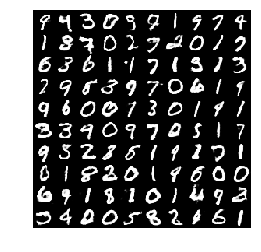

[0.62, 0.58, 0.17, 0.25, 0.38, 0.16, 0.21, 0.91, 0.97, 0.44]
[0.43, 0.55, 0.47, 0.36, 0.93, 0.29, 0.54, 0.2, 0.94, 0.73]
[0.16, 0.58, 0.42, 0.42, 0.33, 0.76, 0.53, 0.44, 0.42, 0.11]
[0.33, 0.73, 0.56, 0.59, 0.29, 0.88, 0.48, 0.78, 0.58, 0.33]
[0.45, 0.57, 0.48, 0.49, 0.27, 0.44, 0.77, 0.81, 0.71, 0.64]
[0.55, 0.33, 0.36, 0.49, 0.45, 0.75, 0.43, 0.25, 0.28, 0.28]
[0.67, 0.31, 0.91, 0.72, 0.9, 0.72, 0.72, 0.32, 0.08, 0.59]
[0.19, 0.21, 0.83, 0.84, 0.43, 0.28, 0.44, 0.3, 0.47, 0.22]
[0.92, 0.58, 0.5, 0.87, 0.3, 0.51, 0.49, 0.58, 0.53, 0.62]
[0.48, 0.45, 0.28, 0.37, 0.97, 0.72, 0.3, 0.29, 0.37, 0.61]


In [9]:
noise = np.random.uniform(-1, 1, (100, LATENT_SIZE))

# get a batch to display
x_g = g.predict(noise, verbose=0)

img = collage(x_g)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

fake = []

for i, x in enumerate(x_g):
    tmp = d.predict(x.reshape(1, 28, 28, 1))
    fake.append(round(float(tmp[0]), 2))
    if (i + 1) % 10 == 0:
        print(fake)
        fake = []

Load MNIST CNN classifier

In [10]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
cnn.load_weights('mnist_cnn.hdf5')
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0292482925278
Test accuracy: 0.9903


Analysis on ACGAN

In [11]:
def random_sample(size):

    # Generate samples from g
    z = np.random.uniform(-1, 1, (size, LATENT_SIZE))
    # Sampled labels
    y_sampled = np.random.randint(0, 10, size)
    return z, y_sampled

def generate_random(g, size):

    z, y_sampled = random_sample(size)
    x_g = g.predict([z, y_sampled.reshape((-1, 1))], verbose=0)
    return x_g, y_sampled

def collage(images):
    img = (np.concatenate([np.concatenate([s for s in r], axis=1)
                           for r in np.split(images, 10)], axis=0) *
           SCALE + SCALE).astype(np.uint8)
    return np.squeeze(img)

def show(x):
    plt.imshow(x.reshape(28, 28) / 2 + 1, cmap='gray')
    plt.axis('off')
    plt.show()

In [22]:
x_g, y_g = generate_random(g, 1000)

In [31]:
cnn.evaluate(x_g, y_g)

  32/1000 [..............................] - ETA: 0s

[0.00047955510020983636, 1.0]

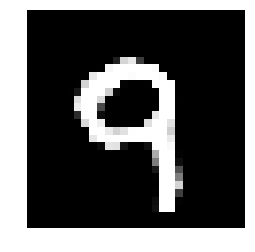

In [60]:
z = np.ones((1, 100))
y_g = np.array([9])
x_g = g.predict([z, y_g.reshape((-1, 1))], verbose=0)
show(x_g)

20.0


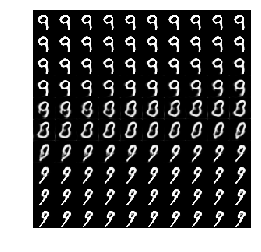

In [74]:
y_g = np.array([9])

#z1, z2 = np.random.rand(2, 1, 100) * 2 - 1
z1 = np.zeros((1, 100)) + 1
z2 = np.zeros((1, 100)) - 1

step = (z2 - z1) / 100
x_in = np.zeros((100, 28, 28, 1))
for i in range(100):
    x_in[i] = g.predict([z1 + step*i, y_g.reshape((-1, 1))], verbose=0)
print(np.linalg.norm(z1 - z2))
plt.imshow(collage(x_in), cmap='gray')
plt.axis('off')
plt.show()

Analysis on DCGAN

In [12]:
def generate_random(g, size):

    z = np.random.uniform(-1, 1, (size, LATENT_SIZE))
    x_g = g.predict(z, verbose=0)
    return x_g, z

8.43726530313


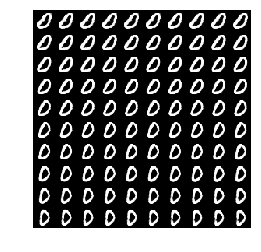

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [13]:
z1, z2 = np.random.rand(2, 1, 100) * 2 - 1
#z1 = np.zeros((1, 100)) + 1
#z2 = np.zeros((1, 100)) - 1
p = np.zeros(100,)

step = (z2 - z1) / 100
x_in = np.zeros((100, 28, 28, 1))
for i in range(100):
    x_in[i] = g.predict(z1 + step*i, verbose=0)
    pred = cnn.predict(x_in[i].reshape(1,28,28,1))
    p[i] = np.argmax(pred[0])
print(np.linalg.norm(z1 - z2))
plt.imshow(collage(x_in), cmap='gray')
plt.axis('off')
plt.show()
print(p.reshape(10, 10))

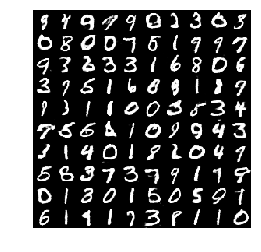

In [17]:
z = np.random.rand(100, 100) * 2 - 1
x_g = g.predict(z, verbose=0)
plt.imshow(collage(x_g), cmap='gray')
plt.axis('off')
plt.show()

7.56446139504


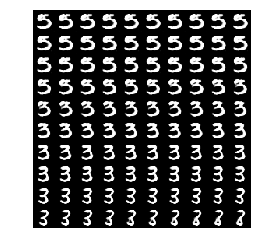

[[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 3.  3.  3.  3.  3.  3.  3.  2.  2.  2.]]


In [15]:
z1 = z[2].reshape(1, 100)
z2 = z[4].reshape(1, 100)
p1 = np.zeros((100,))
p2 = np.zeros((100,))

step = (z2 - z1) / 100
x_in = np.zeros((100, 28, 28, 1))
for i in range(100):
    x_in[i] = g.predict(z1 + step*i, verbose=0)
    pred = cnn.predict(x_in[i].reshape(1,28,28,1))
    p1[i] = np.argmax(pred[0])
#     p1[i] = pred[0, 2]
#     p2[i] = pred[0, 9]
    
print(np.linalg.norm(z1 - z2))
plt.imshow(collage(x_in), cmap='gray')
plt.axis('off')
plt.show()
print(p1.reshape(10, 10))
# print((p1 > p2).reshape(10, 10))
# print(p1)
# print(p2)

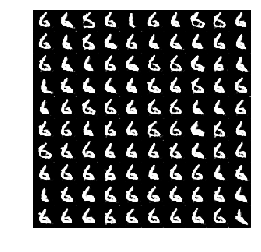

In [16]:
z = np.random.rand(100, 100) - 2
x_g = g.predict(z, verbose=0)
plt.imshow(collage(x_g), cmap='gray')
plt.axis('off')
plt.show()

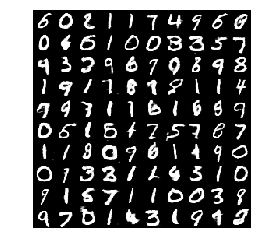

In [18]:
z = np.random.rand(100, 100) * 2 - 1
x_g = g.predict(z, verbose=0)
plt.imshow(collage(x_g), cmap='gray')
plt.axis('off')
plt.show()

7.72724311274


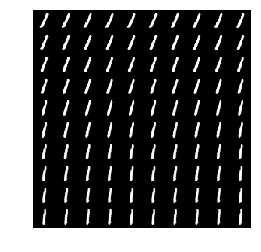

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [31]:
z1 = z[32].reshape(1, 100)
z2 = z[3].reshape(1, 100)
p1 = np.zeros((100,))
p2 = np.zeros((100,))

step = (z2 - z1) / 100
x_in = np.zeros((100, 28, 28, 1))
for i in range(100):
    x_in[i] = g.predict(z1 + step*i, verbose=0)
    pred = cnn.predict(x_in[i].reshape(1,28,28,1))
    p1[i] = np.argmax(pred[0])
    
print(np.linalg.norm(z1 - z2))
plt.imshow(collage(x_in), cmap='gray')
plt.axis('off')
plt.show()
print(p1.reshape(10, 10))

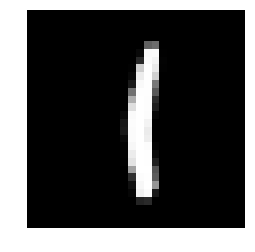

In [29]:
show(g.predict(z1 - z2, verbose=0))

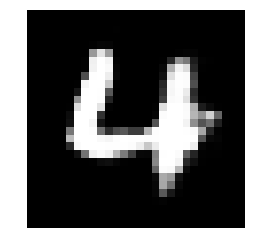

In [30]:
show(g.predict(z[6].reshape(1,100), verbose=0))

In [32]:
z = np.random.rand(60000, 100) * 2 - 1
x_g = g.predict(z, verbose=0)
y_g = cnn.predict(x_g)

In [36]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(z, np.argmax(y_g, axis=1))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
z_test = np.random.rand(10000, 100) * 2 - 1
x_g = g.predict(z_test, verbose=0)
y_g_test = cnn.predict(x_g)

In [41]:
clf.score(z_test, np.argmax(y_g_test, axis=1))

0.85389999999999999

In [46]:
clf2 = SVC(kernel='linear')
clf2.fit(x_train.reshape(-1, 784), y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
clf2.score(x_test.reshape(-1, 784), y_test)

0.93589999999999995

---
Train MNIST CNN classifier

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist_cnn.hdf5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s - loss: 0.3242 - acc: 0.8997 - val_loss: 0.0721 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 3s - loss: 0.1067 - acc: 0.9678 - val_loss: 0.0484 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 3s - loss: 0.0791 - acc: 0.9761 - val_loss: 0.0422 - val_acc: 0.9854
Epoch 4/12
60000/60000 [==============================] - 3s - loss: 0.0668 - acc: 0.9807 - val_loss: 0.0361 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 3s - loss: 0.0571 - acc: 0.9831 - val_loss: 0.0331 - val_acc: 0.9885
Epoch 6/12
60000/60000 [==============================] - 3s - loss: 0.0528 - acc: 0.9841 - val_loss: 0.0335 - val_acc: 0.9893
Epoch 7/12
60000/60000 [==============================] - 3s - loss: 0.0464 - acc: 0.9862 - val_loss: 0.0312 - val_acc: 0.9900
Epoch 8/12
60000/60000 [==============================] - 3s 

OSError: Unable to create file (Unable to truncate a file which is already open)

In [ ]:
train(prog=True)

Epoch 1 of 50
467/468 [============================>.] - ETA: 0s
Testing for epoch 1:
component              | loss
-----------------------------------------------------------------
generator (train)      | 1.0436
generator (test)       | 0.6704
discriminator (train)  | 1.6959
discriminator (test)   | 2.2709
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 7, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Accuracy: 0.8705
Epoch 2 of 50
467/468 [============================>.] - ETA: 0s
Testing for epoch 2:
component              | loss
-----------------------------------------------------------------
generator (train)      | 0.7552
generator (test)       | 0.6748
discriminator (train)  | 1.7514
discriminator (test)   | 2.2990
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 